# 이변량_숫자 vs 범주

# 1.환경준비

## (1) 라이브러리

In [1]:
import pandas as pd
import numpy as np
# import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

## (2) 데이터 불러오기
* 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


# 2.숫자 --> 범주

## (1) 시각화

* 히스토그램을 Survived로 나눠서 그려봅시다.

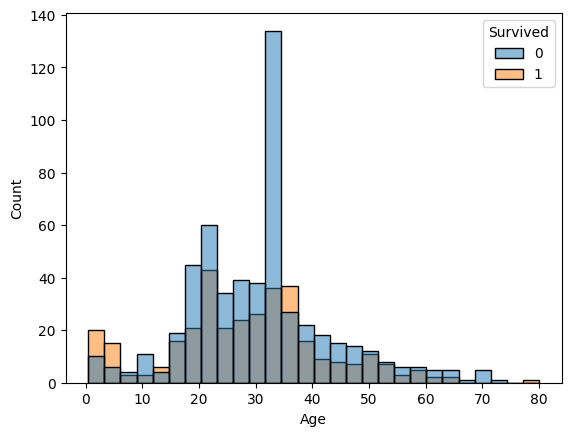

In [3]:
sns.histplot(x='Age', data = titanic, hue = 'Survived')
plt.show()

* kdeplot을 그려봅시다.  
* 두가지 방법이 있습니다.
    * ① kdeplot(   , hue = 'Survived')
        * 생존여부의 비율이 유지된 채로 그려짐
        * 두 그래프의 아래 면적의 합이 1
    * ② kdeplot(   , hue = 'Survived', common_norm = False)
        * 생존여부 각각 아래 면적의 합이 1인 그래프
    * ③ kdeplot(   , hue = 'Survived', multiple = 'fill')
        * 나이에 따라 생존여부 **비율**을 비교해볼 수 있음. (양의 비교가 아닌 비율!)


① kdeplot( , hue = 'Survived)

* common_norm = True (기본값)

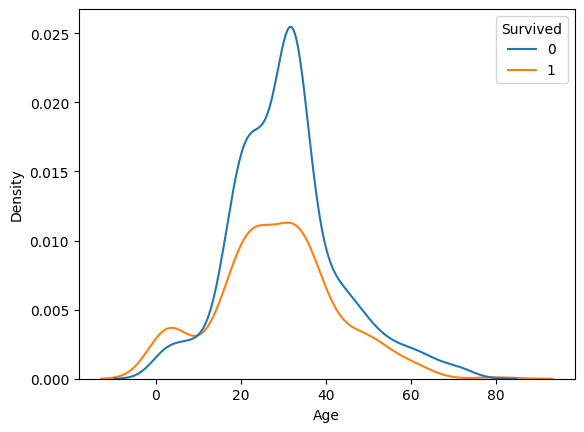

In [4]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived')
plt.show()

② kdeplot( , hue = 'Survived, common_norm = False)

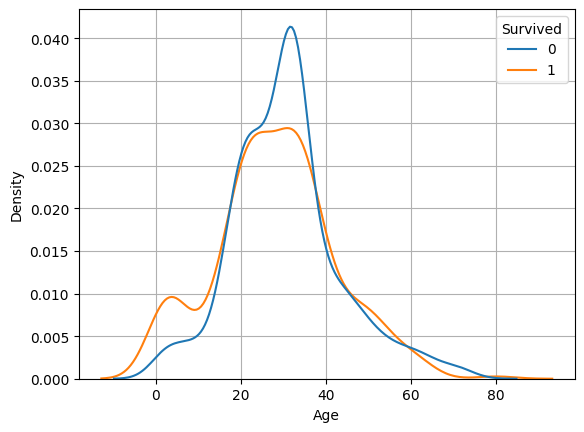

In [5]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived',
            common_norm = False)
plt.grid()
plt.show()

③ multiple = 'fill' 옵션

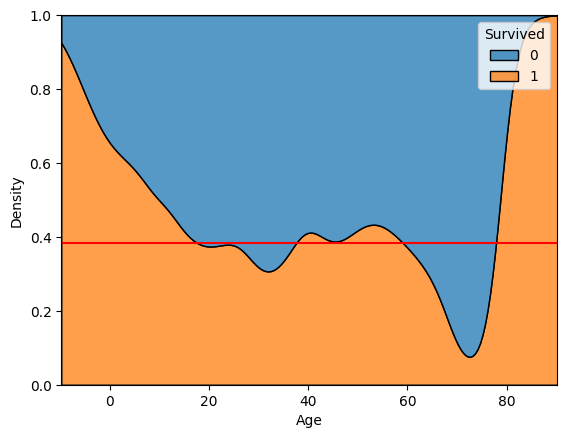

In [6]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

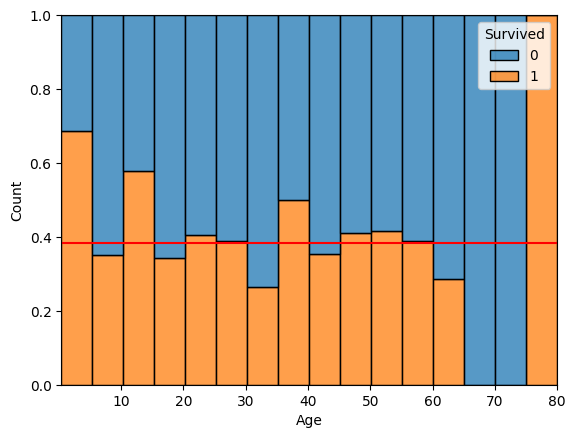

In [7]:
sns.histplot(x='Age', data = titanic, bins = 16
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 시각화 해 봅시다.

* [문1] Fare(운임) --> Survived

In [8]:
var = 'Fare'

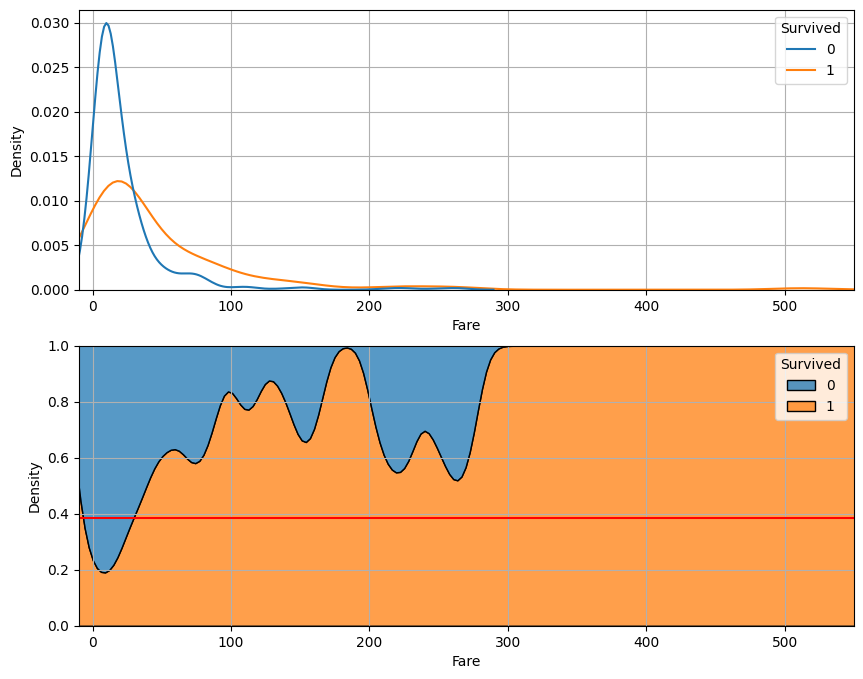

In [9]:
plt.figure(figsize = (10,8))
plt.subplot(2, 1, 1)
sns.kdeplot(x=var, data = titanic, hue ='Survived',
            common_norm = False)
plt.grid()
plt.xlim(-10,550)

plt.subplot(2, 1, 2)
sns.kdeplot(x=var, data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.grid()
plt.xlim(-10,550)
plt.show()

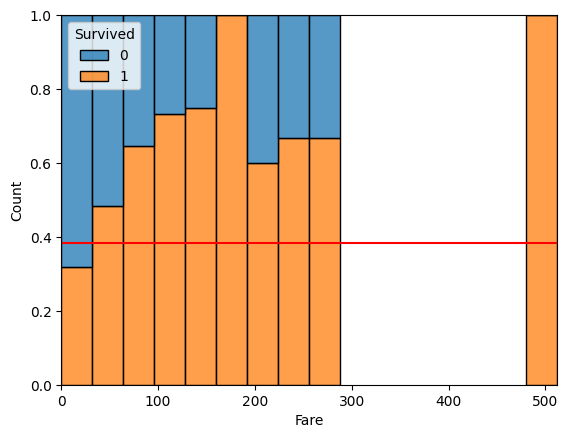

In [10]:
sns.histplot(x=var, data = titanic, bins = 16
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

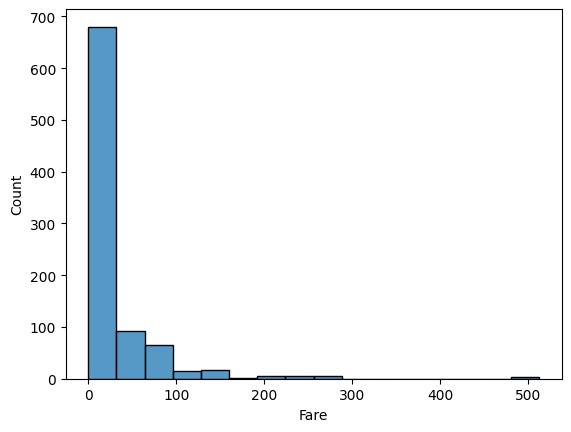

In [11]:
sns.histplot(x=var, data = titanic, bins = 16)

# 3.복습문제

* 항공기 탑승객의 만족도와 관련 있는 요인을 분석해 봅시다.
* 약 5천명의 탑승객에 대해서 탑승 경험을 바탕으로 데이터셋이 구성되어 있습니다.
    * Target
        * 탑승 만족도(satisfaction) : 만족 = 1, 불만 = 0
    * Feature
        * 성별, 나이, 여행타입, 객실등급, 비행거리, 객실등급, 비행거리, 식음료 만족도, 출발지연시간


In [15]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Air_Satisfaction.csv'
cols = ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Food and drink',
        'Departure Delay in Minutes', 'satisfaction']
data = pd.read_csv(path, usecols = cols)
data['satisfaction'] = np.where(data['satisfaction'] =='satisfied', 1 ,0)
data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Food and drink,Departure Delay in Minutes,satisfaction
0,Male,13,Personal Travel,Eco Plus,460,5,25,0
1,Male,25,Business travel,Business,235,1,1,0
2,Female,26,Business travel,Business,1142,5,0,1
3,Female,25,Business travel,Business,562,2,11,0
4,Male,61,Business travel,Business,214,4,0,1


In [13]:
target = 'satisfaction'

In [32]:
def eda_2_nc(data, feature, target) :

    plt.figure(figsize = (6, 10))
    plt.subplot(3,1,1)
    sns.kdeplot(x = feature, data = data, hue = target, common_norm = False)
    plt.xlim(data[feature].min(), data[feature].max())
    plt.grid()

    plt.subplot(3,1,2)
    sns.kdeplot(x = feature, data = data, hue = target, multiple = 'fill')
    plt.axhline(data[target].mean(), color = 'r')
    plt.xlim(data[feature].min(), data[feature].max())
    plt.grid()

    plt.subplot(3,1,3)
    sns.histplot(x = feature, data = data, bins = 30, hue = target, multiple = 'fill')
    plt.axhline(data[target].mean(), color = 'r')
    plt.xlim(data[feature].min(), data[feature].max())
    plt.grid()

plt.show()

## (1) Age --> Satisfaction

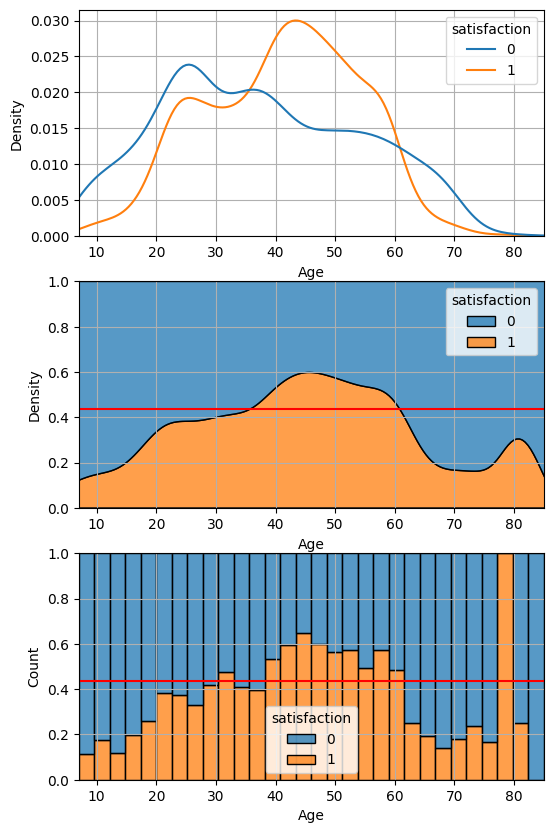

In [33]:
feature = 'Age'
eda_2_nc(data, feature, target)

## (2) Flight Distance --> Satisfaction

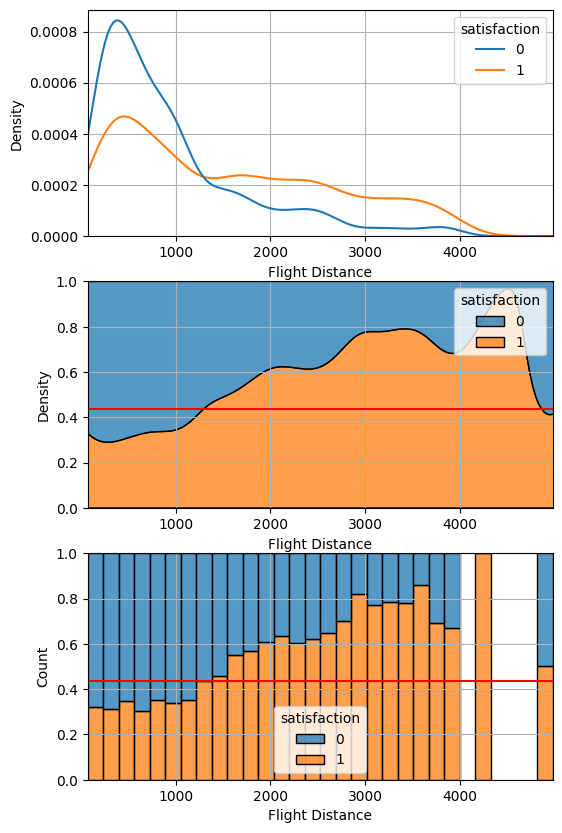

In [34]:
feature = 'Flight Distance'
eda_2_nc(data, feature, target)

## (3) Departure Delay in Minutes --> Satisfaction

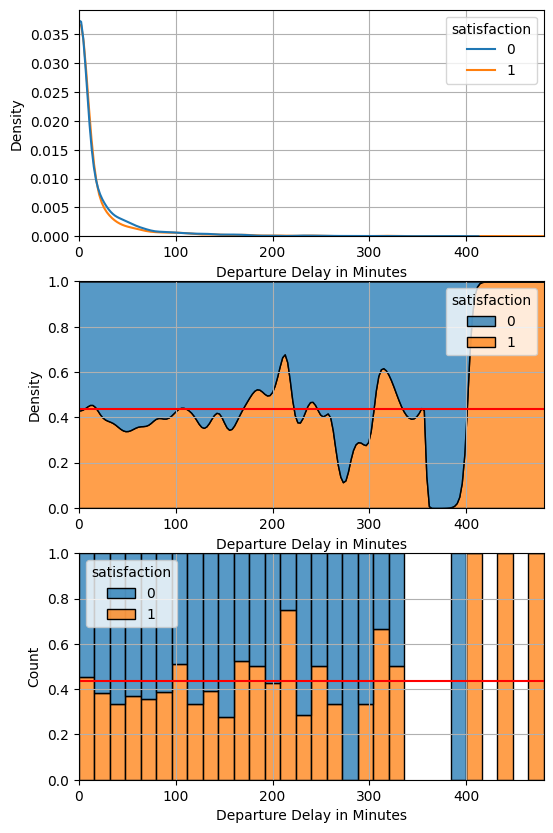

In [35]:
feature = 'Departure Delay in Minutes'
eda_2_nc(data, feature, target)